In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fonction_stage as st
from numpy.fft import fft 
from numpy.fft import ifft 
import scipy as sp
from scipy.signal import butter, lfilter, filtfilt
from scipy.signal import freqz

In [72]:
############# A modifier SIMU #############
name='2D_150'
data=np.loadtxt('2D_150.txt')

tsimu=0.6
Nrec=24
mail_fmax=150
######################################

ech=np.size(data)/Nrec
ech=int(ech)
dt=tsimu/ech
fmax=1/dt
fNy=fmax/2
df=1/tsimu

data=np.reshape(data, np.size(data))
data=np.reshape(data, (ech,Nrec))

np.shape(data)


tmin=0+dt
tmax=tsimu+dt
temps=np.linspace(tmin,tmax,ech)


print("ech, nombre de points du signal =",ech)
print("dt, pas de temps", dt)
print("fmax, fech =",fmax)
print("fNy=", fNy)
print("df, pas en fréquence=", df)

ech, nombre de points du signal = 12509
dt, pas de temps 4.7965464865296985e-05
fmax, fech = 20848.333333333332
fNy= 10424.166666666666
df, pas en fréquence= 1.6666666666666667


In [73]:
#########terrain####################
name_terrain='data_t02'
data_t=np.loadtxt('P0_02_19Sept.txt')

tsimu_t=1
Nrec=24
mail_fmax=150
######################################

ech_t=np.size(data_t)/Nrec
ech_t=int(ech_t)
dt_t=tsimu_t/ech_t
fmax_t=1/dt_t
fNy_t=fmax_t/2
df_t=1/tsimu_t



print("ech, nombre de points du signal =",ech_t)
print("dt, pas de temps", dt_t)
print("fmax, fech =",fmax_t)
print("fNy=", fNy_t)
print("df, pas en fréquence=", df_t)

np.shape(data_t)

ech, nombre de points du signal = 4000
dt, pas de temps 0.00025
fmax, fech = 4000.0
fNy= 2000.0
df, pas en fréquence= 1.0


(4000, 24)

(0, 4000)

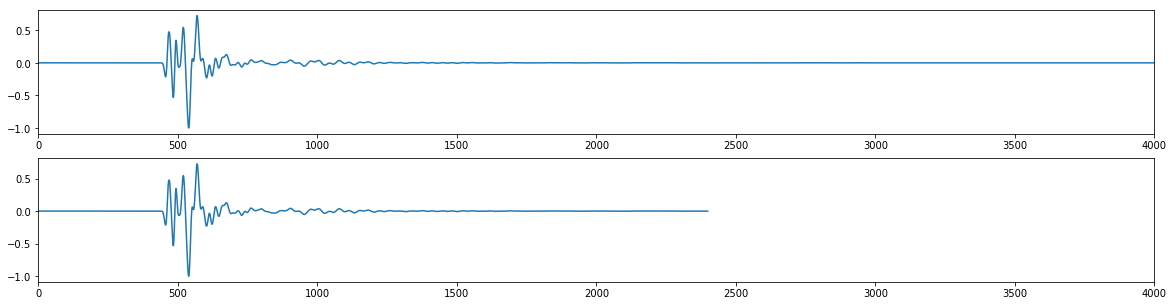

In [75]:
############# RESAMPLE #########################
diff_temps=tsimu_t-tsimu
nb_ech=int(ech_t-(diff_temps/dt_t))


data_t2=data_t[0:nb_ech,:]
np.shape(data_t2)


np.shape(data_t_resamp)

plt.figure(figsize=(20,5))
plt.subplot(211)
plt.plot(data_t[:,0])
plt.xlim(0,4000)
plt.subplot(212)
plt.plot(data_t2[:,0])
plt.xlim(0,4000)

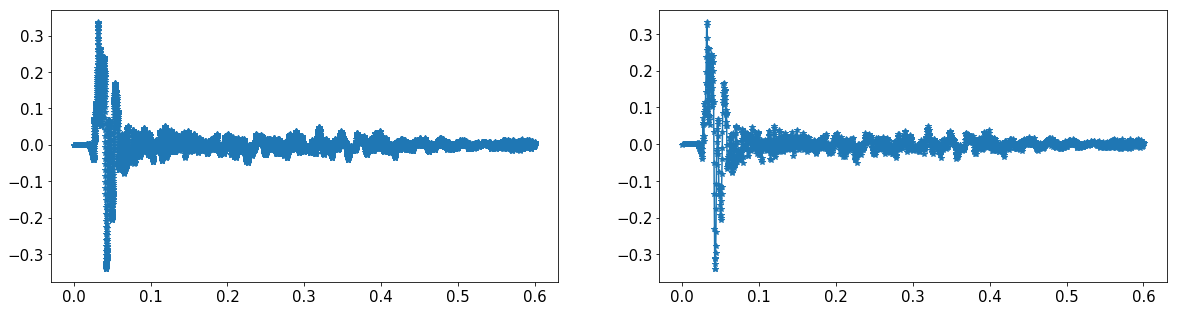

In [76]:
tmin_t=0+dt_t
tmax_t=tsimu+dt_t
temps_t=np.linspace(tmin_t,tmax_t,2400)

# resample la simu pas le terrain cette fois 
data_resamp=sp.signal.resample(data,2400)

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(temps, data[:,1],'-*')
plt.tick_params(axis = 'both', labelsize =15)

plt.subplot(122)
plt.plot(temps_t, data_resamp[:,1],'-*')
plt.tick_params(axis = 'both', labelsize =15)


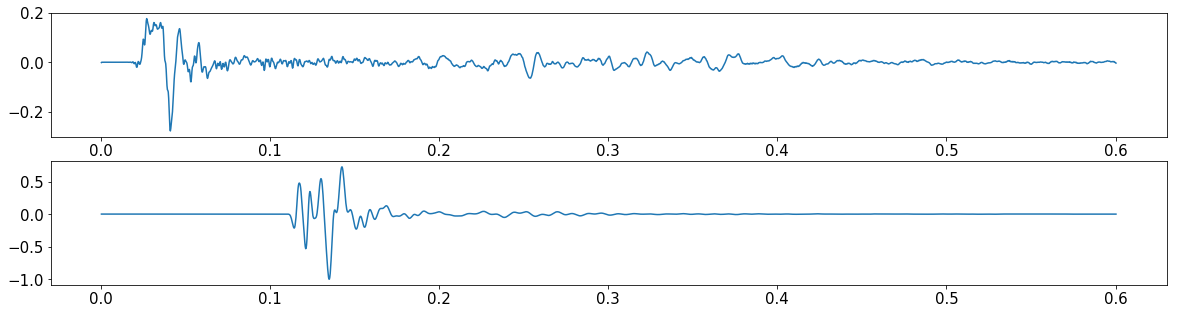

In [78]:
plt.figure(figsize=(20,5))
plt.subplot(211)
plt.plot(temps_t, data_resamp[:,0],'-')
plt.tick_params(axis = 'both', labelsize =15)

plt.subplot(212)
plt.plot(temps_t, data_t2[:,0],'-')
plt.tick_params(axis = 'both', labelsize =15)


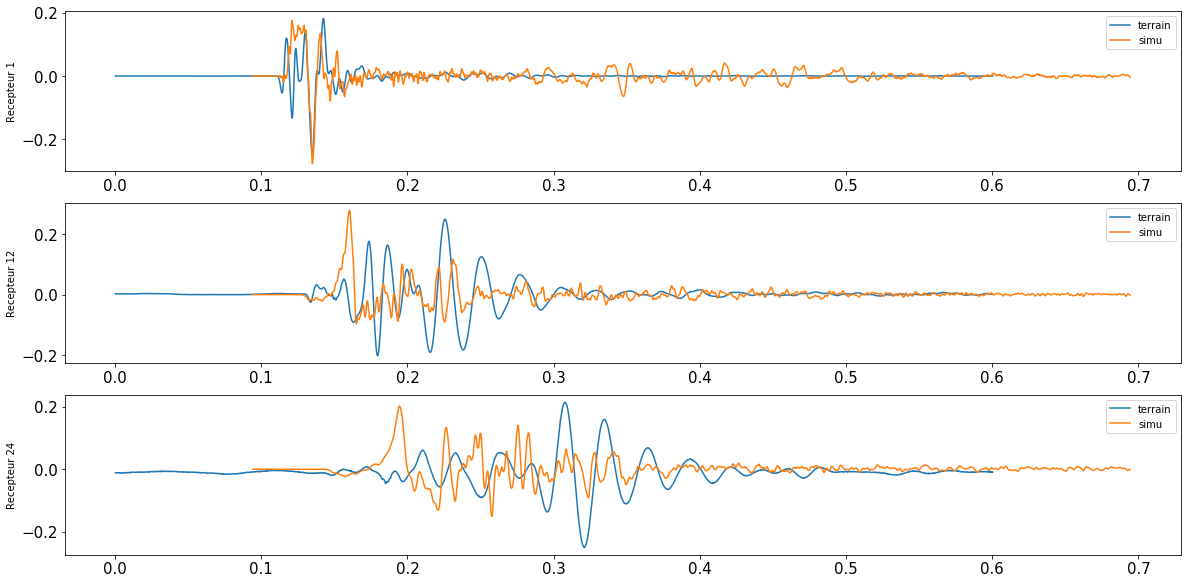

In [91]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(temps_t, (data_t2[:,0]/4),label='terrain')
plt.plot(temps_t+0.094, data_resamp[:,0],label='simu')
plt.legend()
plt.ylabel('Recepteur 1')
plt.tick_params(axis = 'both', labelsize =15)



plt.subplot(312)
plt.plot(temps_t, data_t2[:,11]/4,label='terrain')
plt.plot(temps_t+0.094, data_resamp[:,11],label='simu')
plt.tick_params(axis = 'both', labelsize =15)
plt.ylabel('Recepteur 12')
plt.legend()



plt.subplot(313)
plt.plot(temps_t, data_t2[:,23]/4,label='terrain')
plt.plot(temps_t+0.094, data_resamp[:,23],label='simu')
plt.tick_params(axis = 'both', labelsize =15)
plt.ylabel('Recepteur 24')
plt.legend()

plt.savefig('comparaison_sansat.png')

(2400, 24)


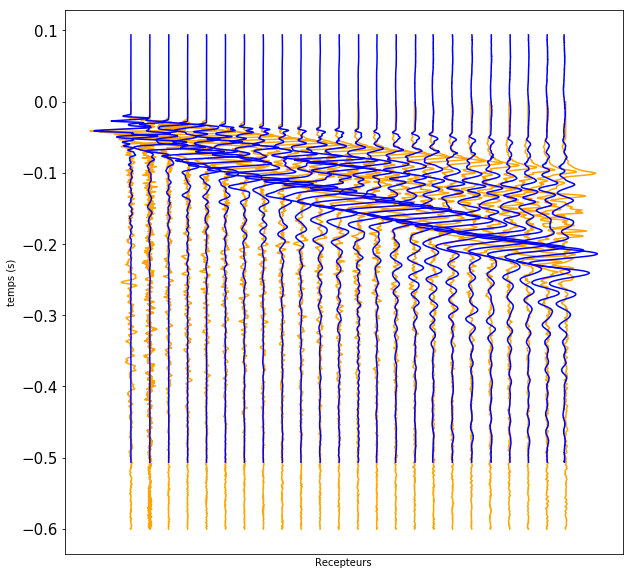

In [92]:
aux=np.max(np.abs(data_resamp))
vecteur=np.linspace(0,(aux/3)*Nrec,Nrec)

mat=np.ones((2400,1))*vecteur
print(np.shape(mat))
data_p=data_resamp+mat
data_tp=(data_t2/4)+mat


plt.figure(figsize=(10,10))
plt.plot(data_p,-temps_t,'orange',label='simu')
plt.plot(data_tp,-temps_t+0.094,'b',label='terrain')

plt.xlabel("Recepteurs")
plt.ylabel("temps (s)")
plt.xticks([]) ;
plt.tick_params(axis = 'both', labelsize =15)

figwave="comp2_sans_at.png"
namefigwave=name+figwave
plt.savefig(namefigwave)

(2400, 24)


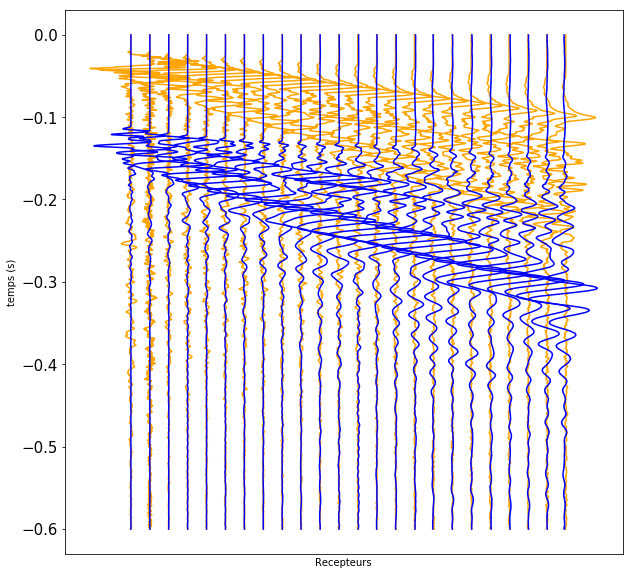

In [88]:
aux=np.max(np.abs(data_resamp))
vecteur=np.linspace(0,(aux/3)*Nrec,Nrec)

mat=np.ones((2400,1))*vecteur
print(np.shape(mat))
data_p=data_resamp+mat
data_tp=(data_t2/4)+mat


plt.figure(figsize=(10,10))
plt.plot(data_p,-temps_t,'orange')
plt.plot(data_tp,-temps_t,'b')


plt.xlabel("Recepteurs")
plt.ylabel("temps (s)")
plt.xticks([]) ;
plt.tick_params(axis = 'both', labelsize =15)

figwave="comp_sans_at.png"
namefigwave=name+figwave
plt.savefig(namefigwave)